In [1]:
import math
import numpy as np
import cmath as cm
import random
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import chainer
from chainer import configuration
from chainer.dataset import convert
import sklearn
from sklearn.utils import shuffle
from tabulate import tabulate
from tqdm import tqdm

#Import the module containing the class pole
import import_ipynb
import final_pole_module
from final_pole_module import detect_cusp, unif_pole, T1, T2, Einput
from final_pole_module import mu1, mu2, T1, T2, T4, Nreal, Nimag, hbarc, seerealimagpart
from final_pole_module import Einput, Ereal, Eimag, Erealfar, Eimagfar, E_exp, labelz, inspect, NEpoints
from final_pole_module import skip_duplicate, export_data, import_data, get_traintest, directory

from datetime import datetime
start_time = datetime.now()

importing Jupyter notebook from final_pole_module.ipynb
Number of poles to be generated per class: 9000000
Ndata to be generated= 36000000
Your directory is: curriculum02_training


importing Jupyter notebook from dataset_gen04.ipynb


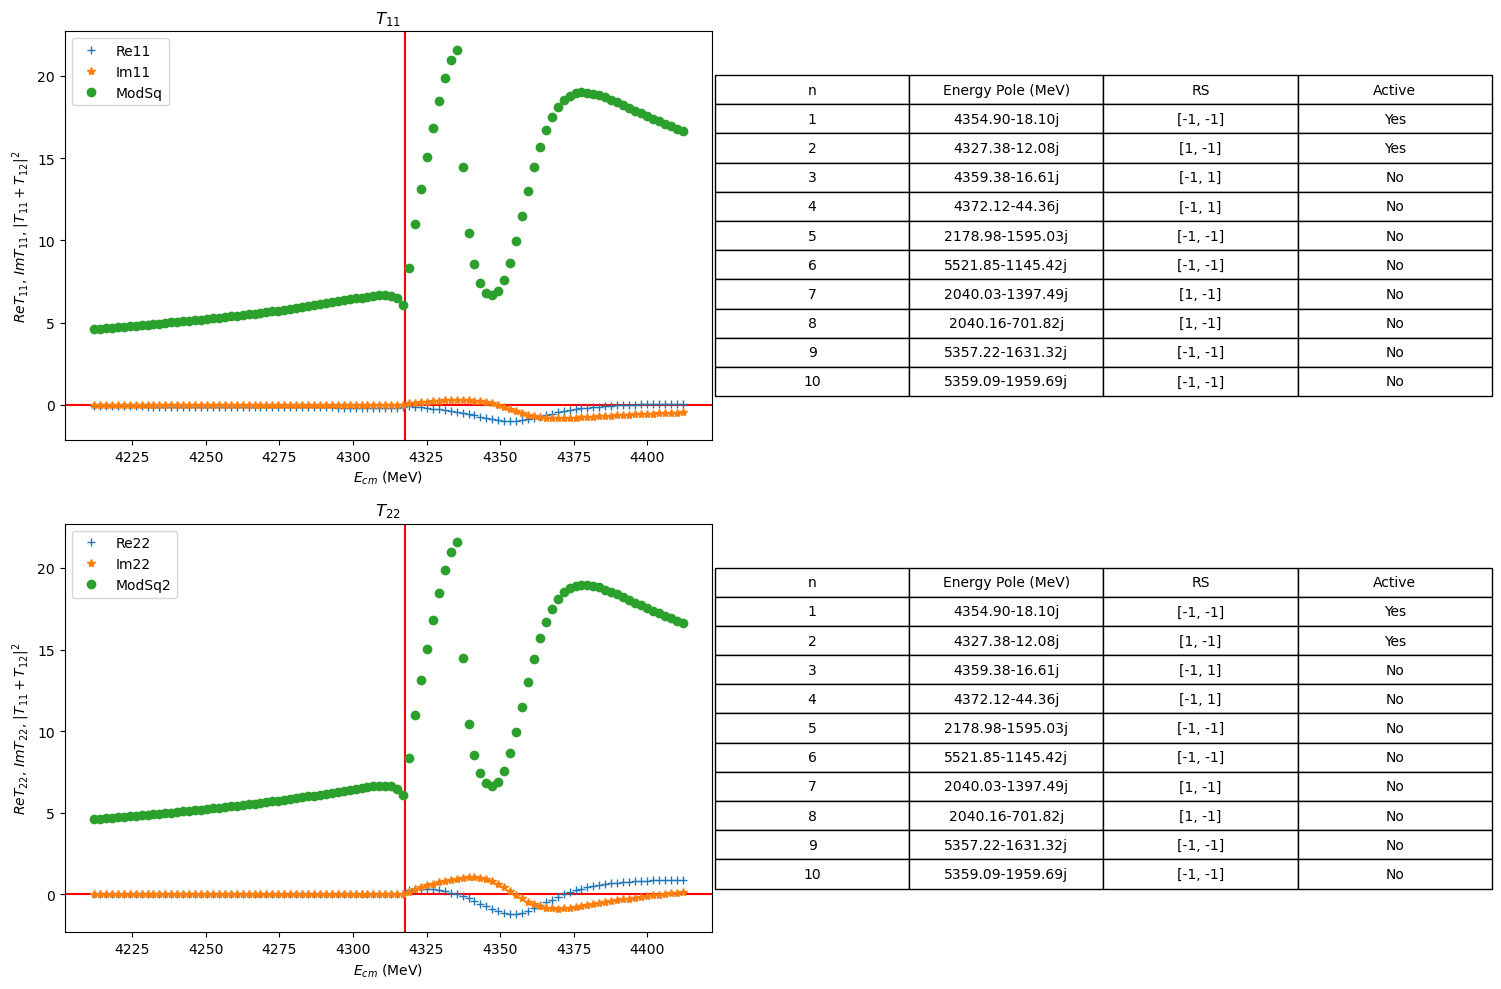

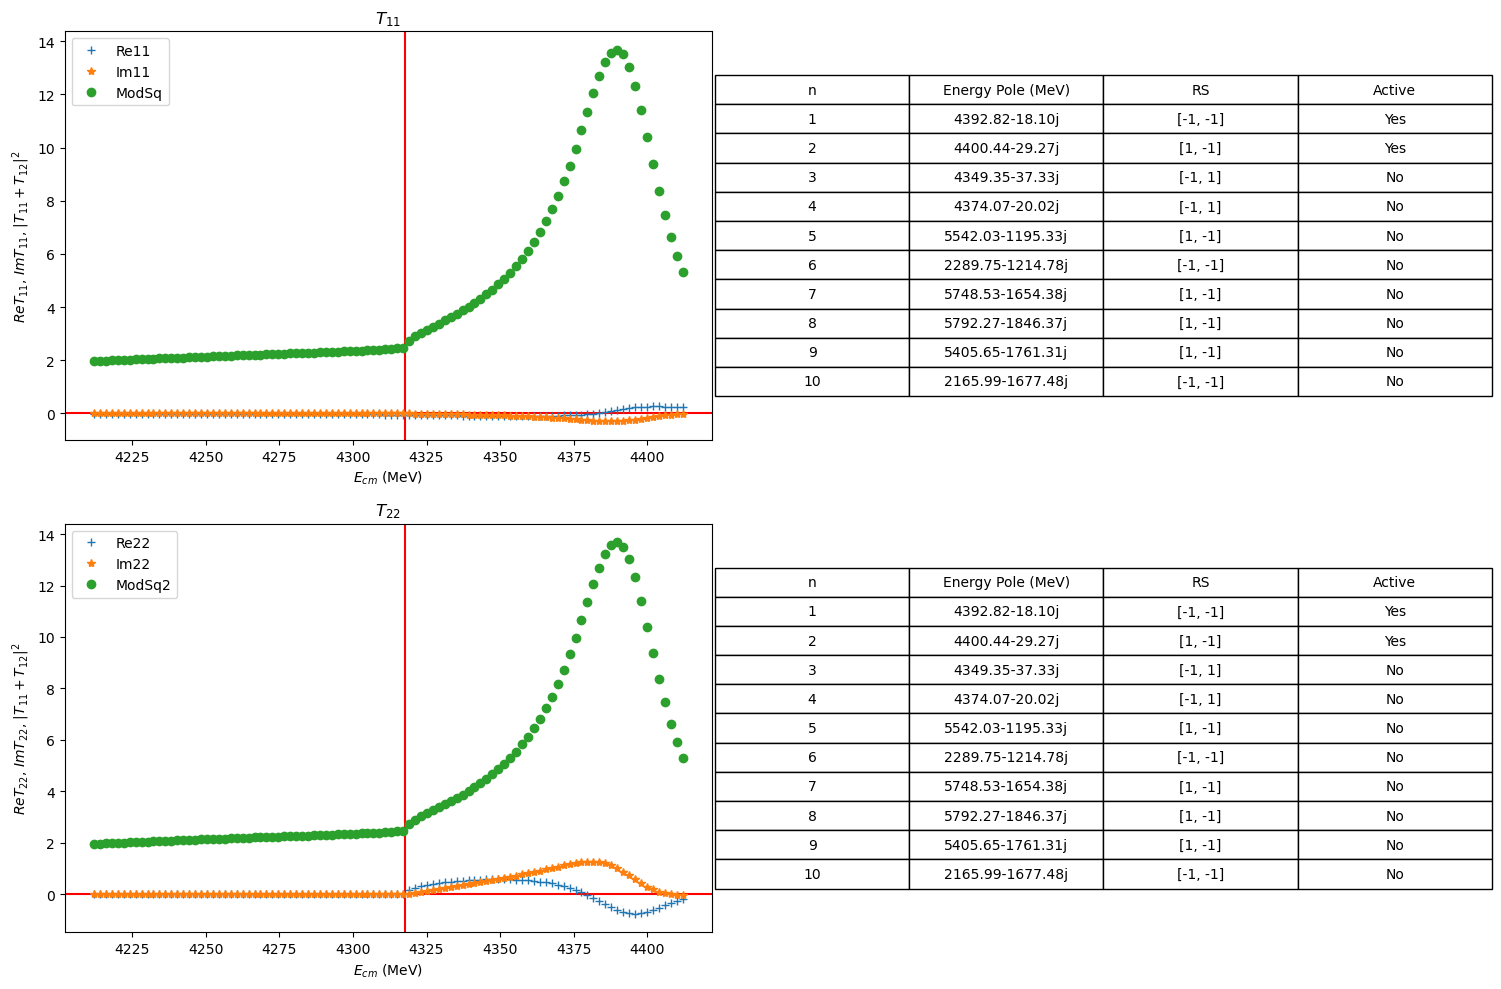

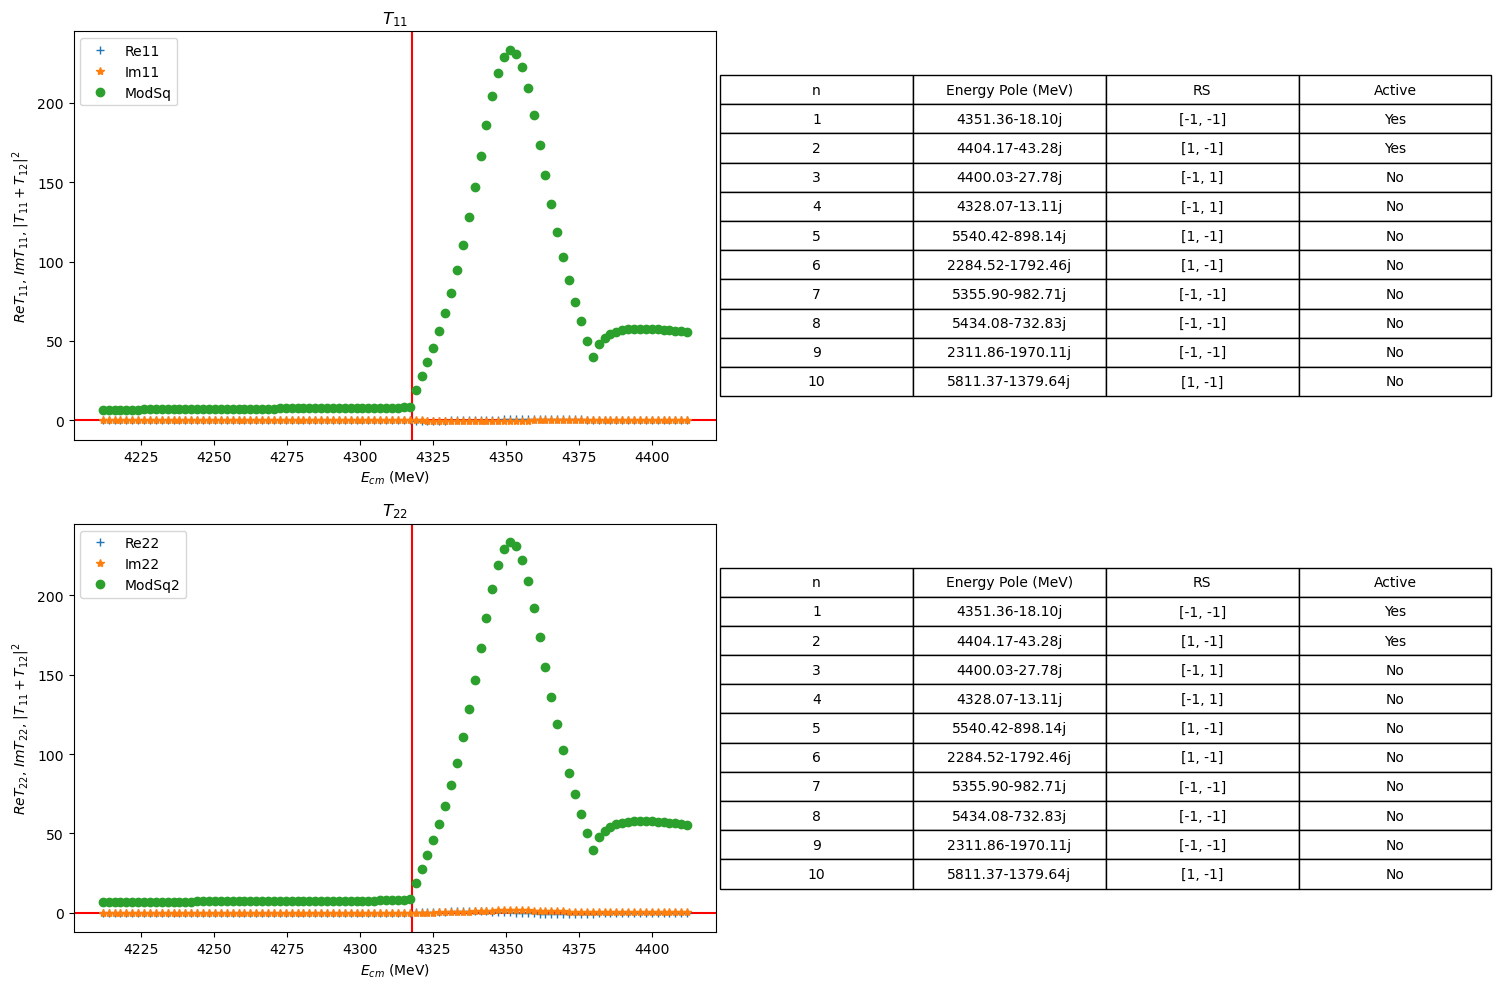

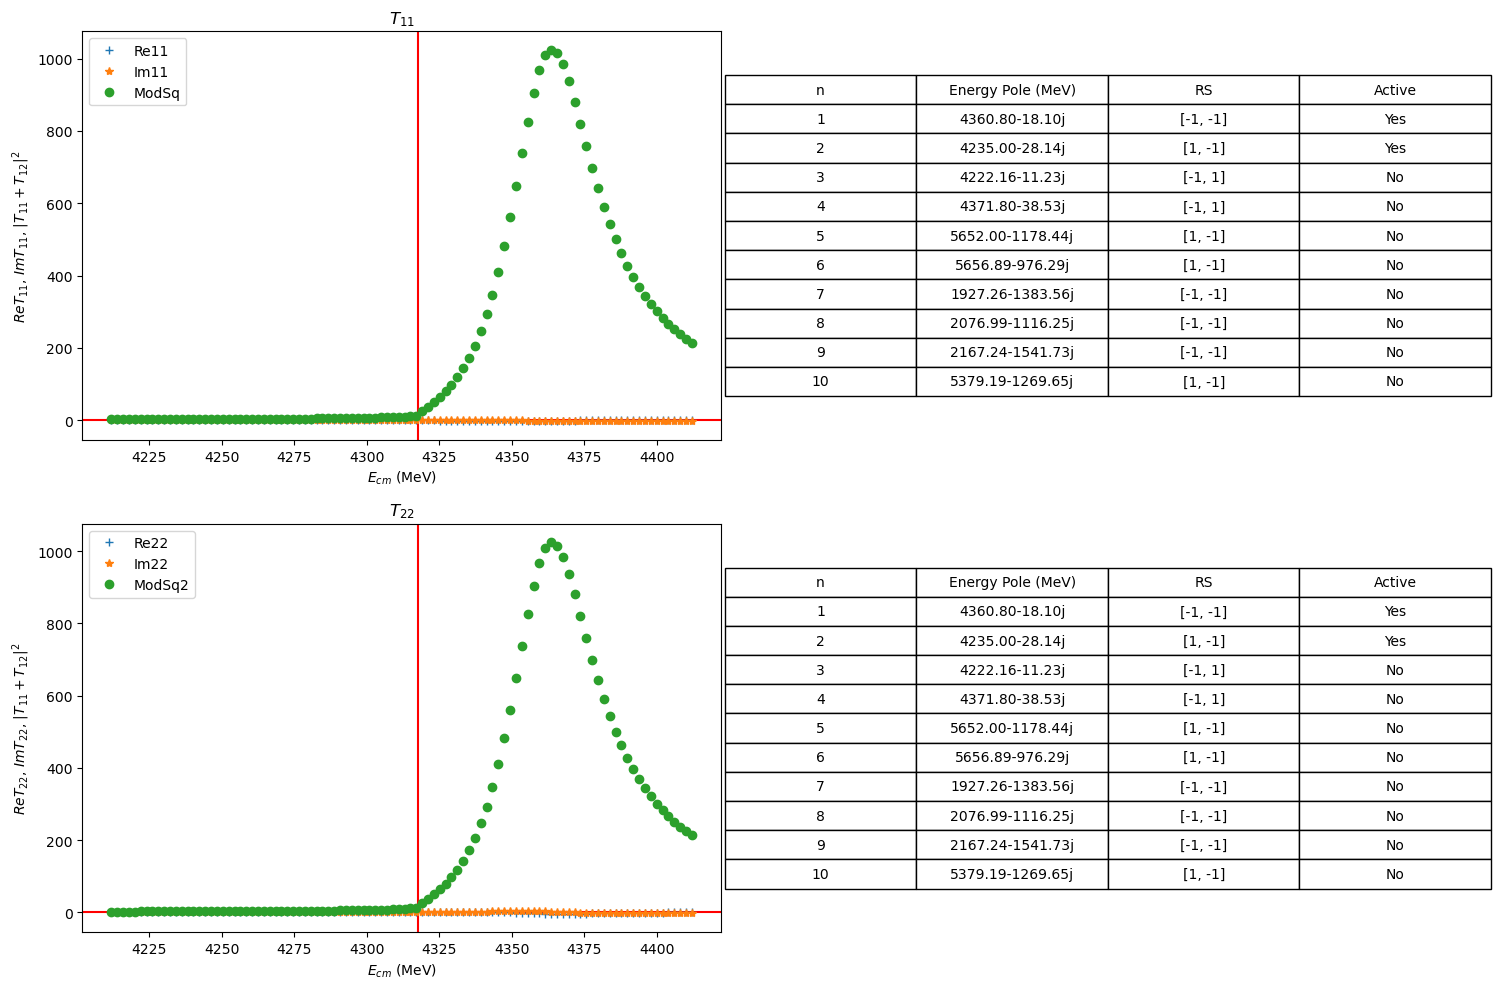

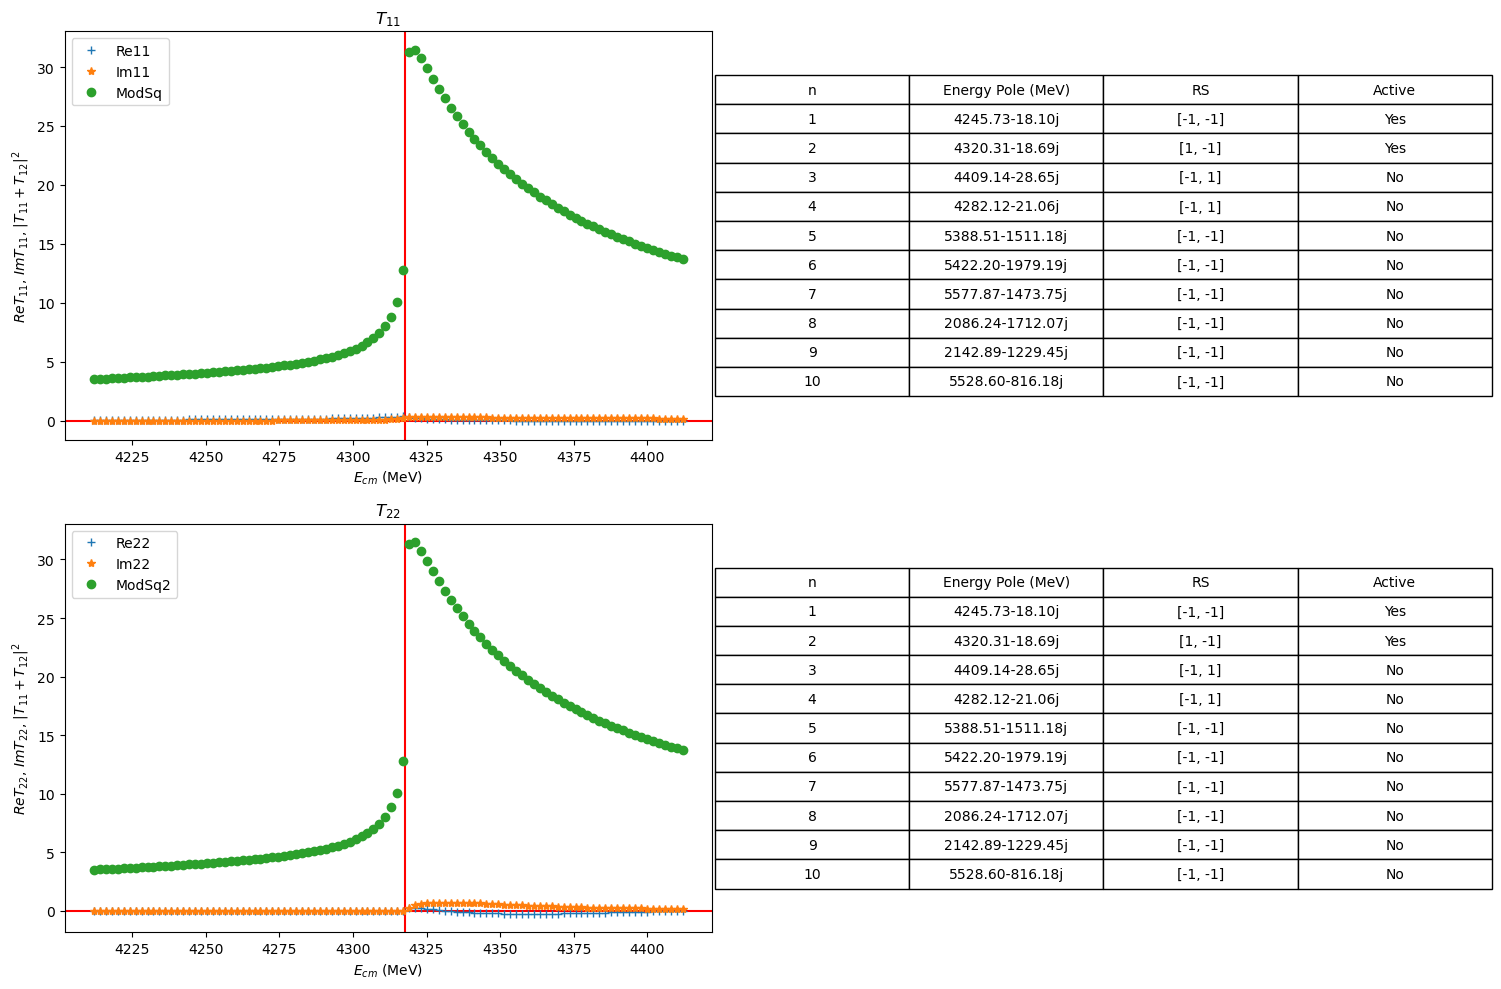

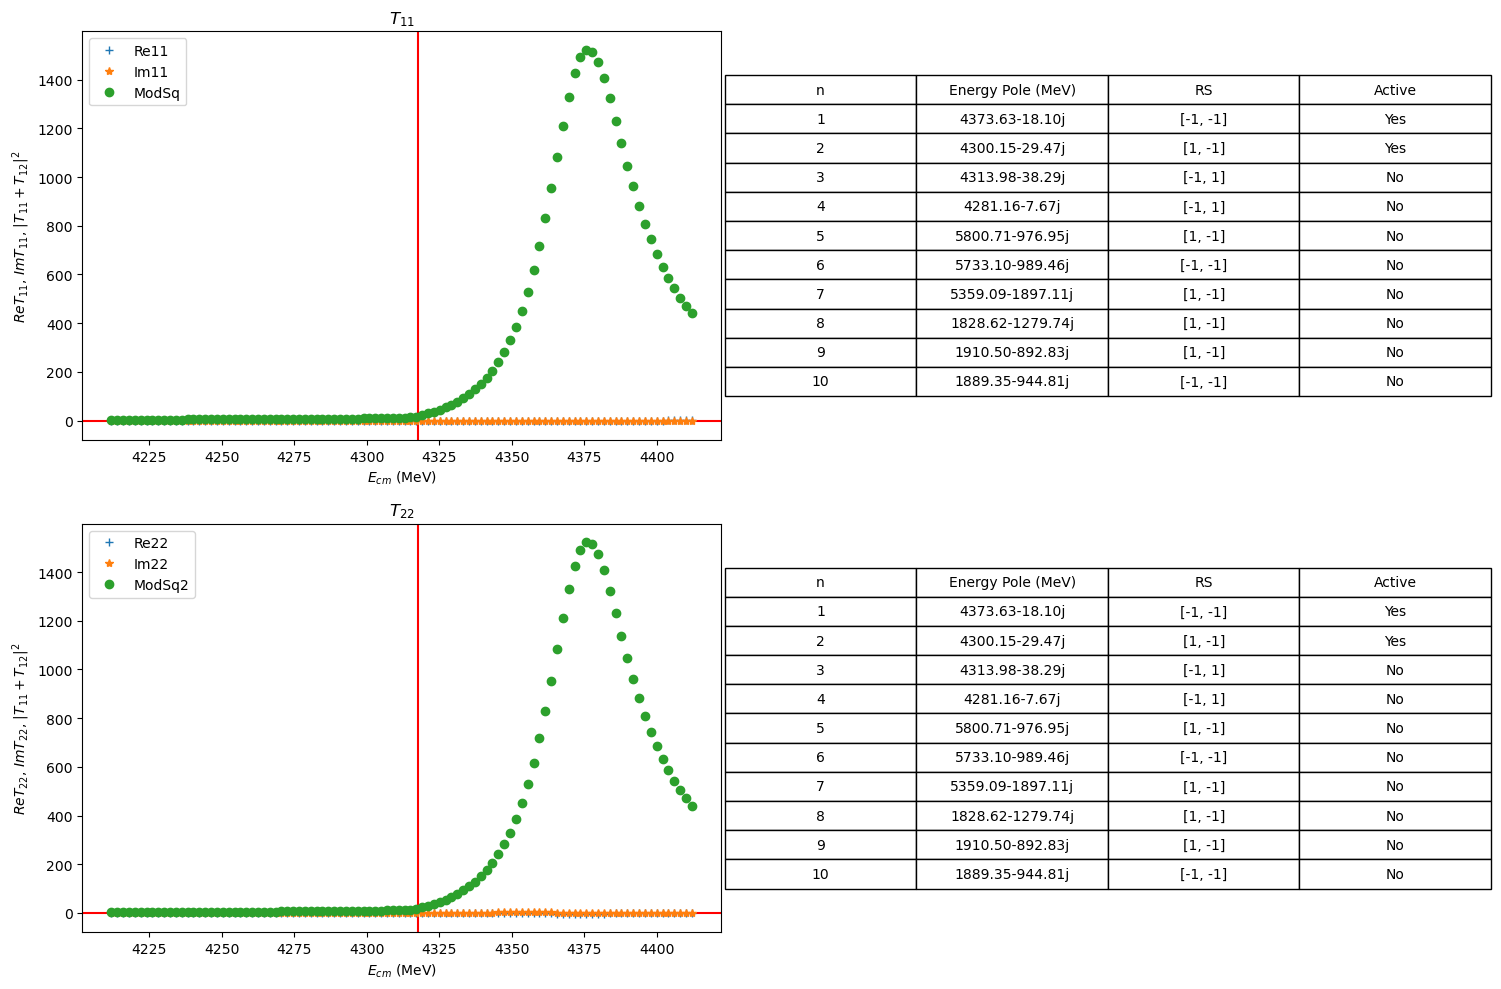

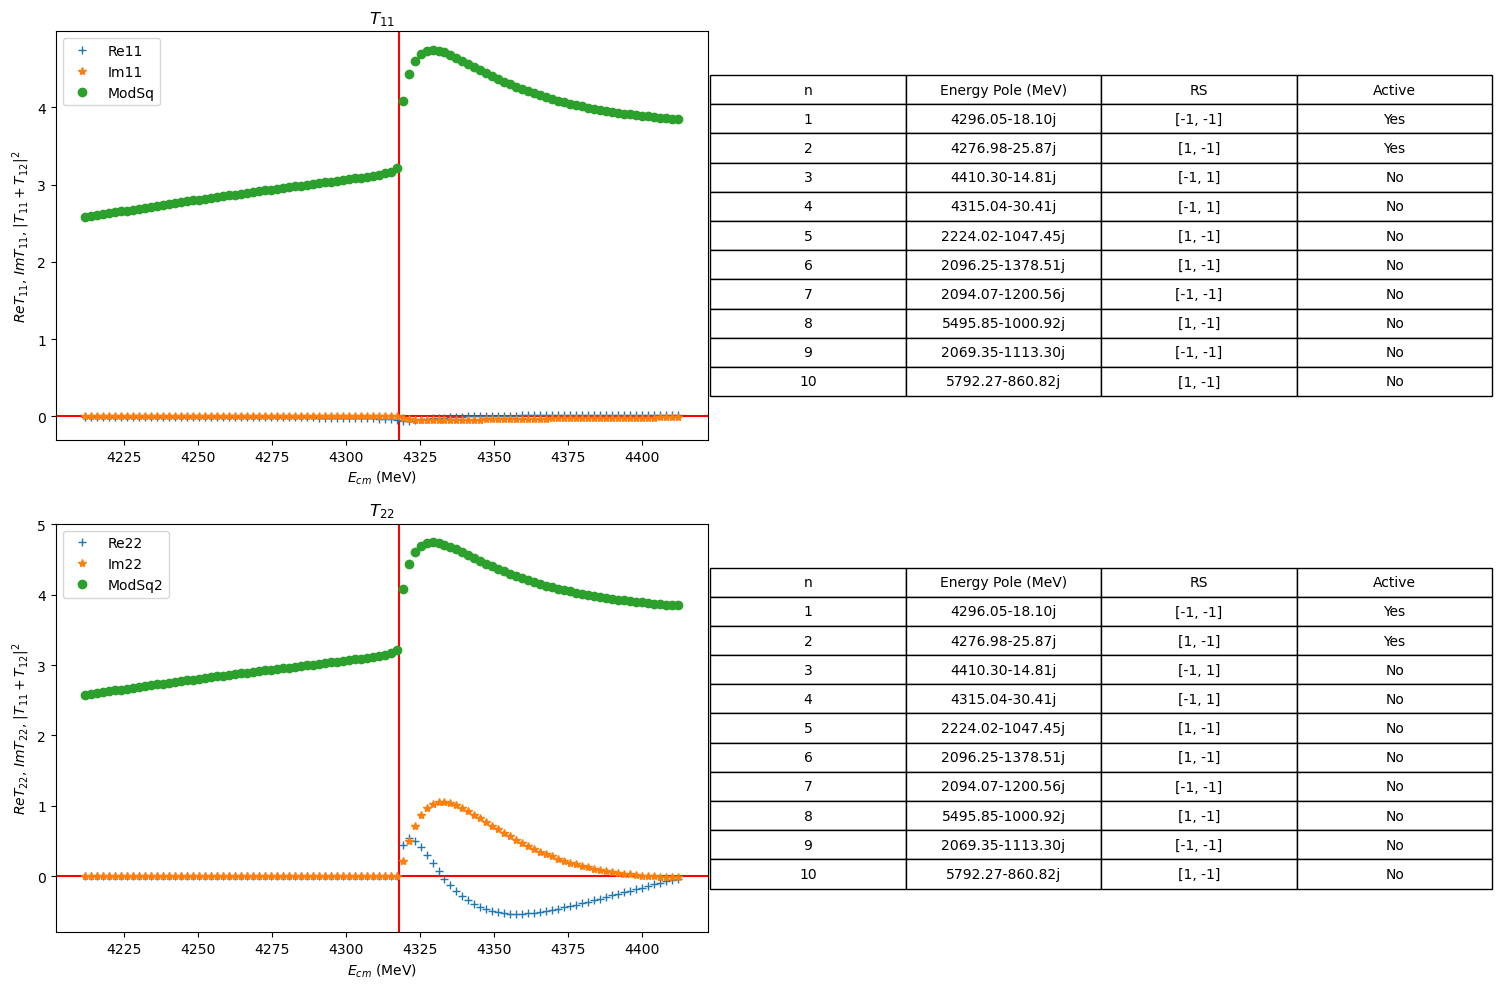

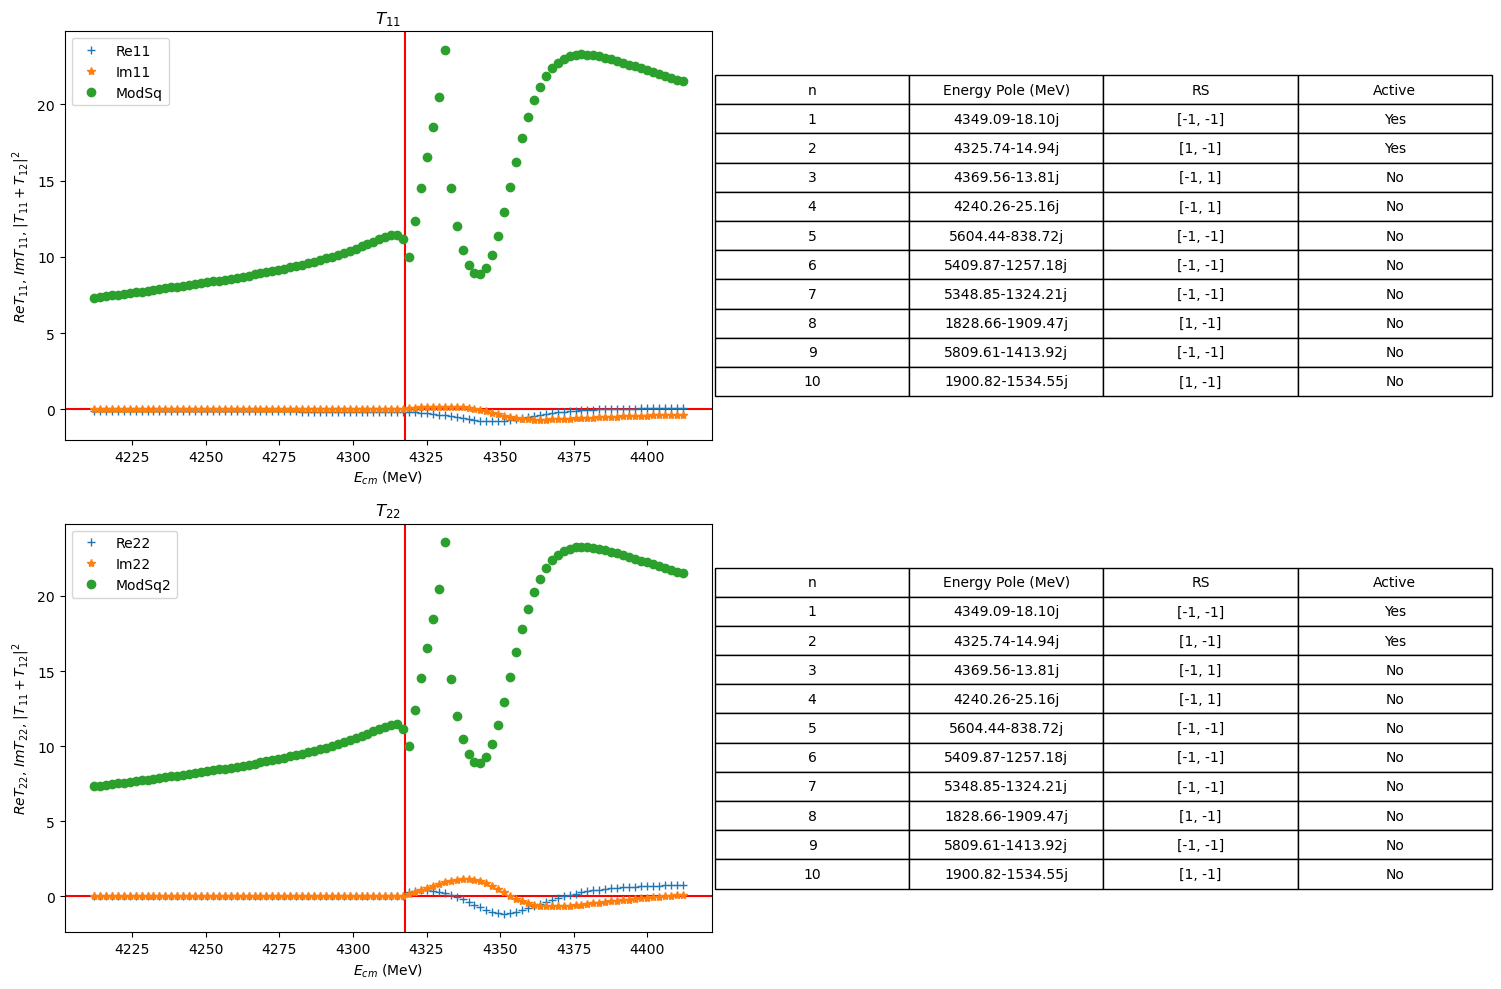

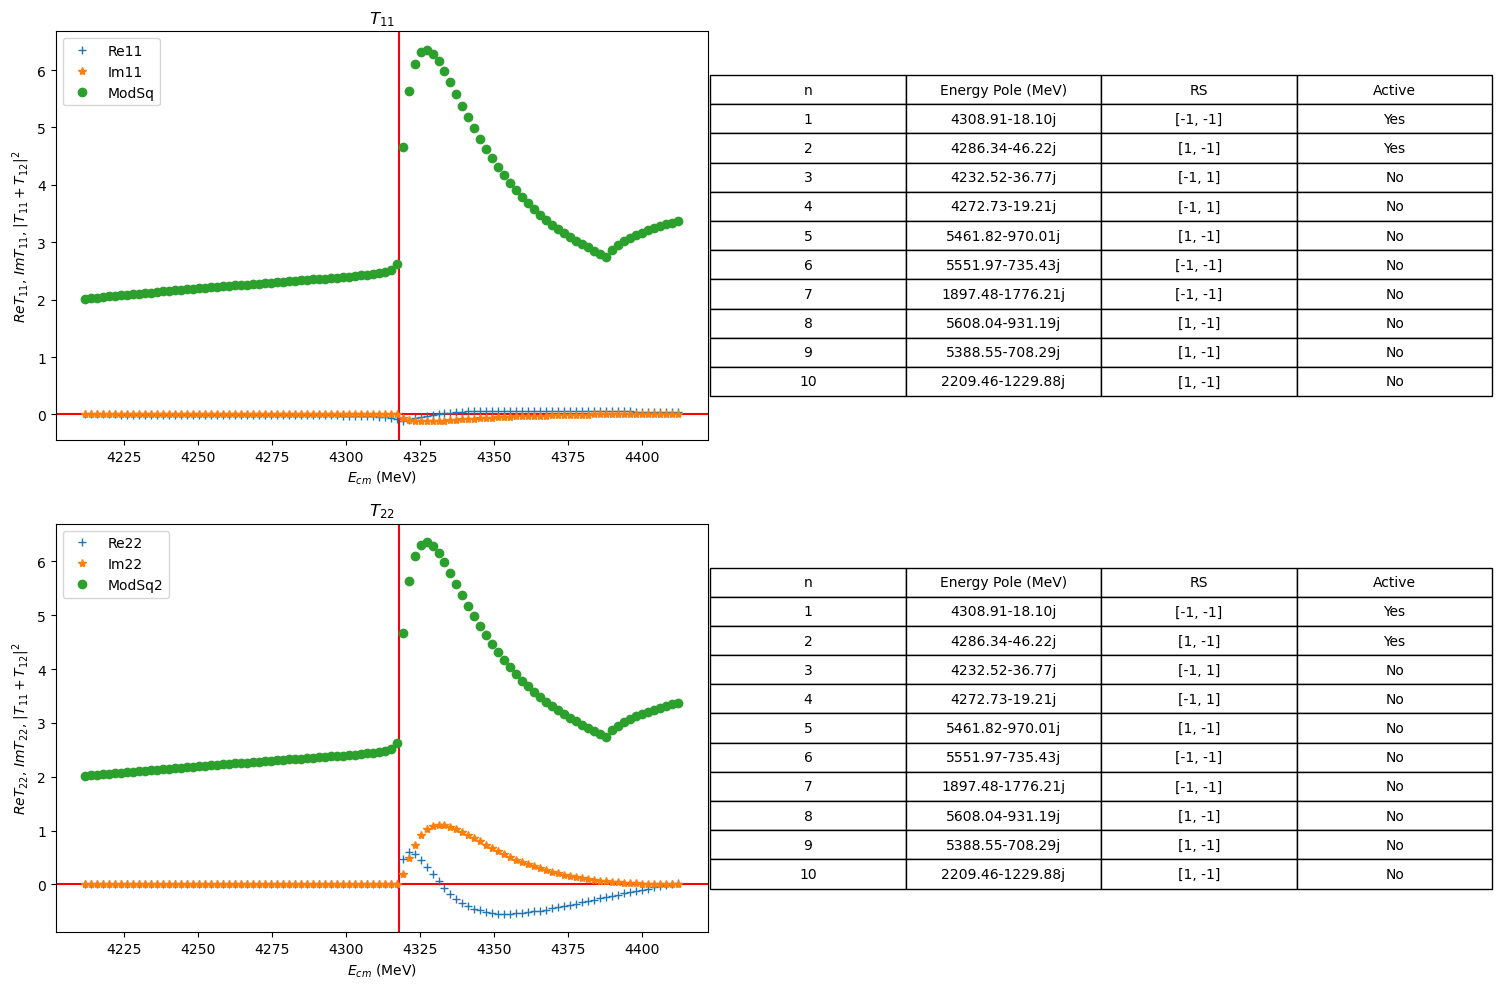

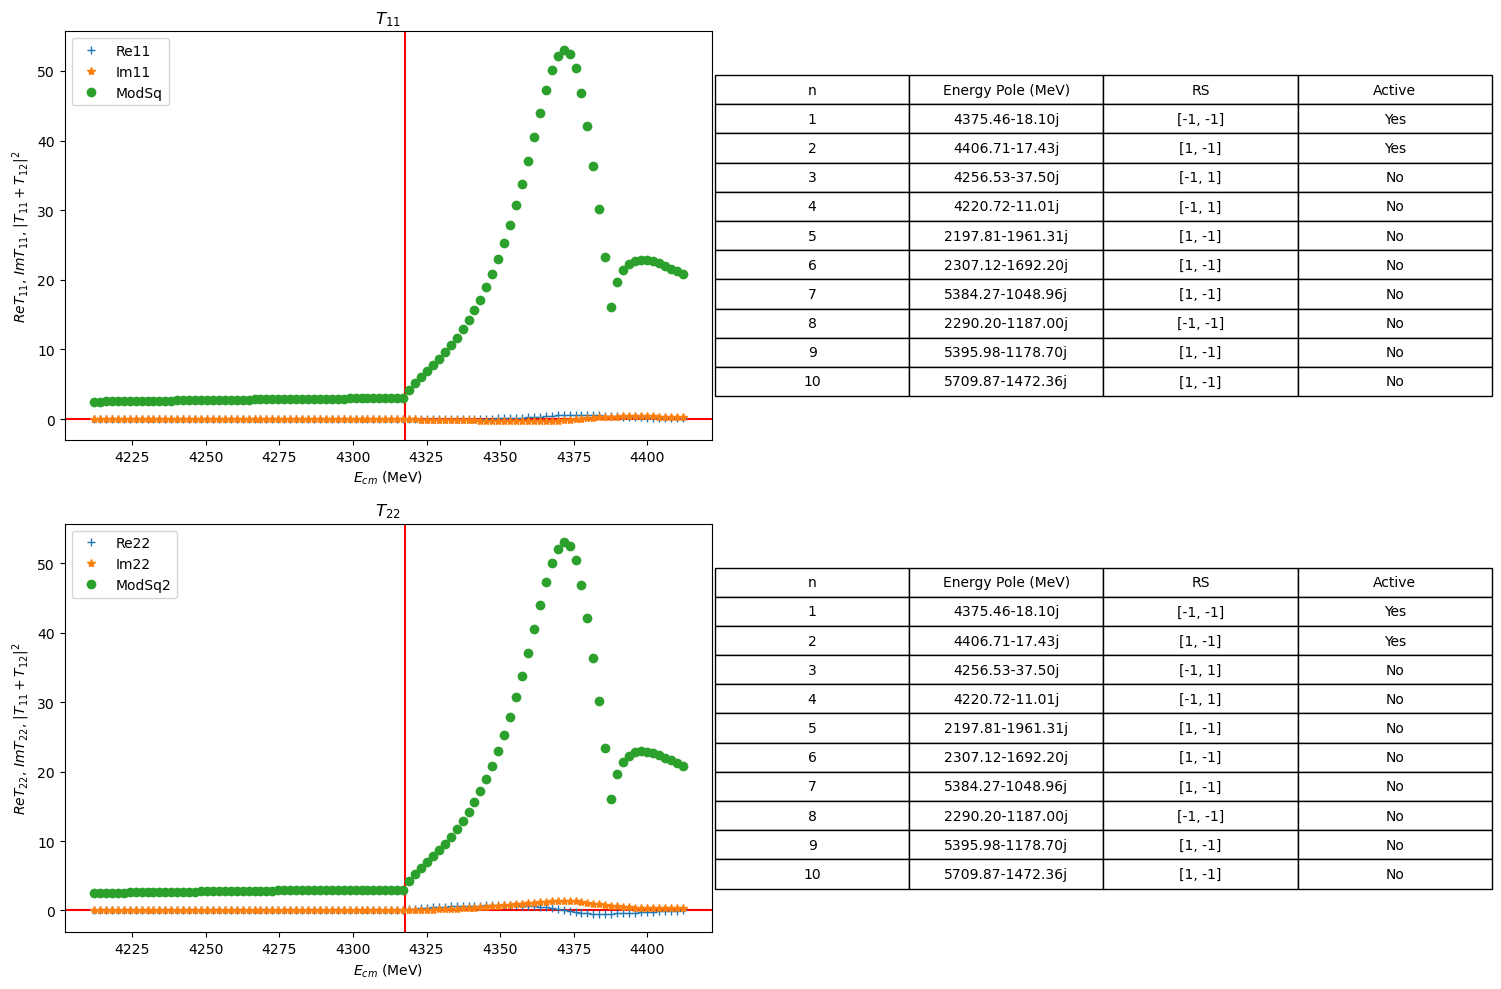

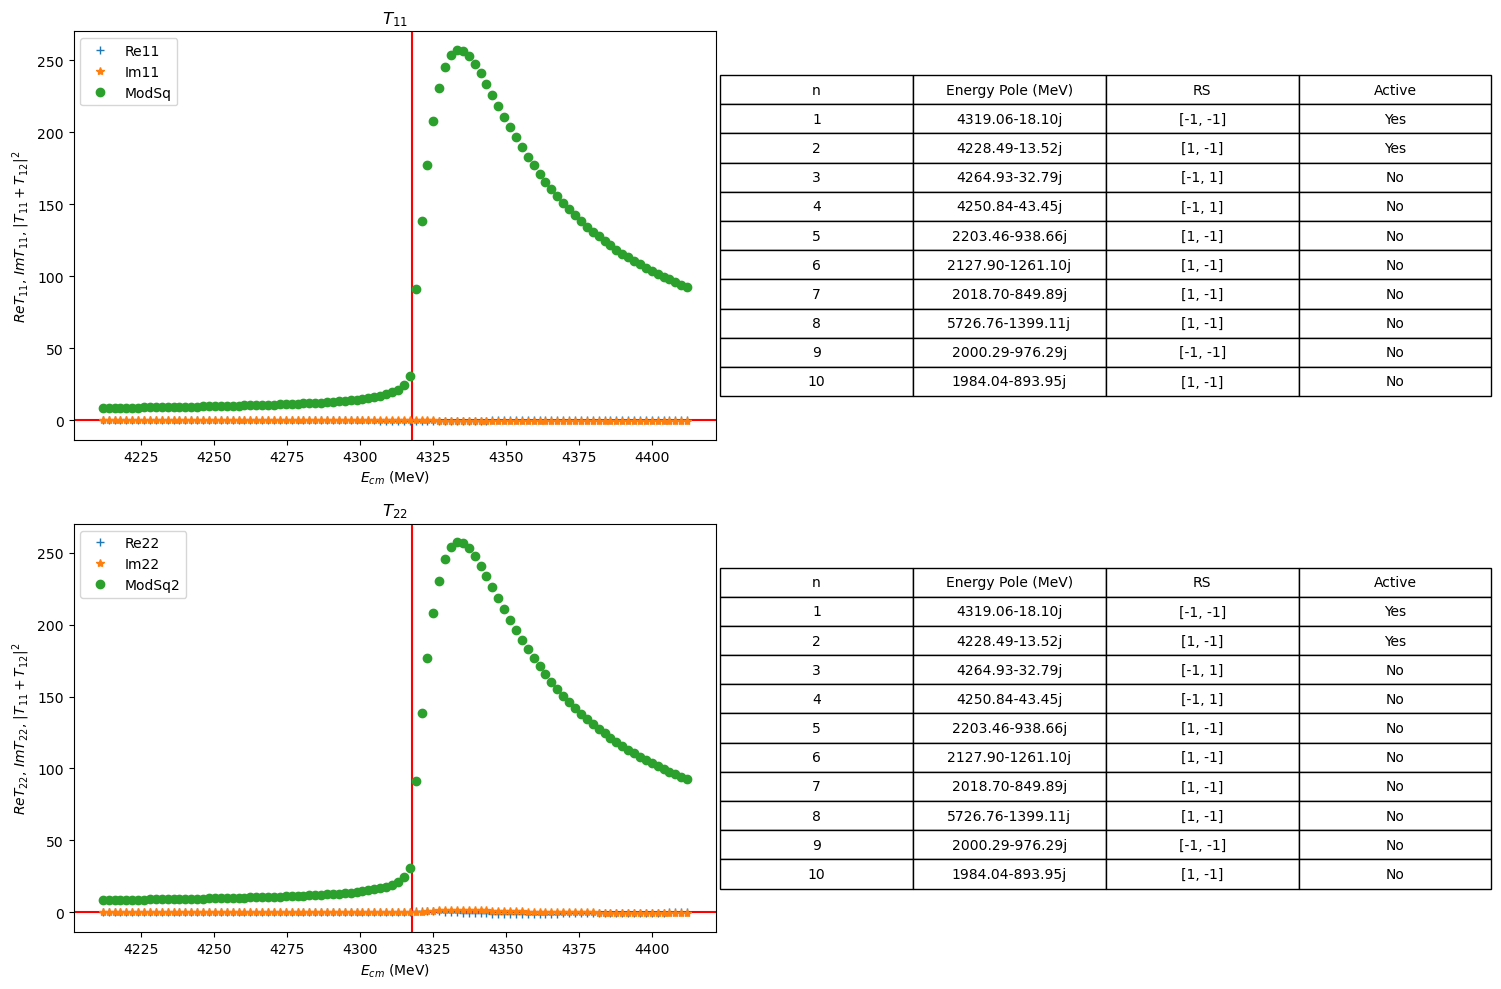

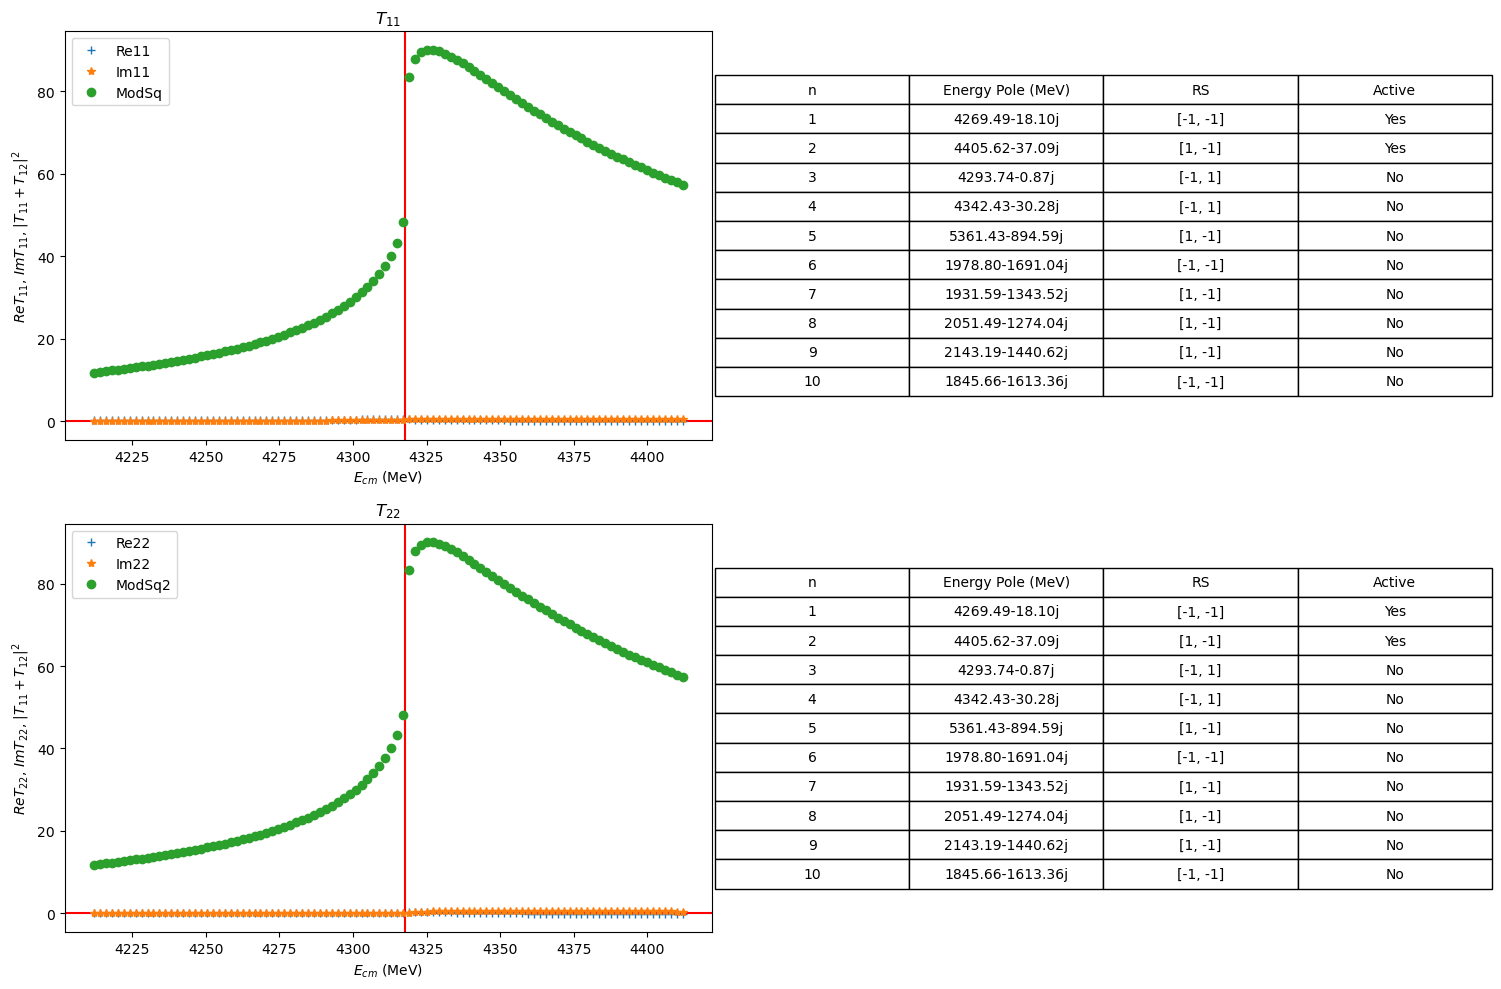

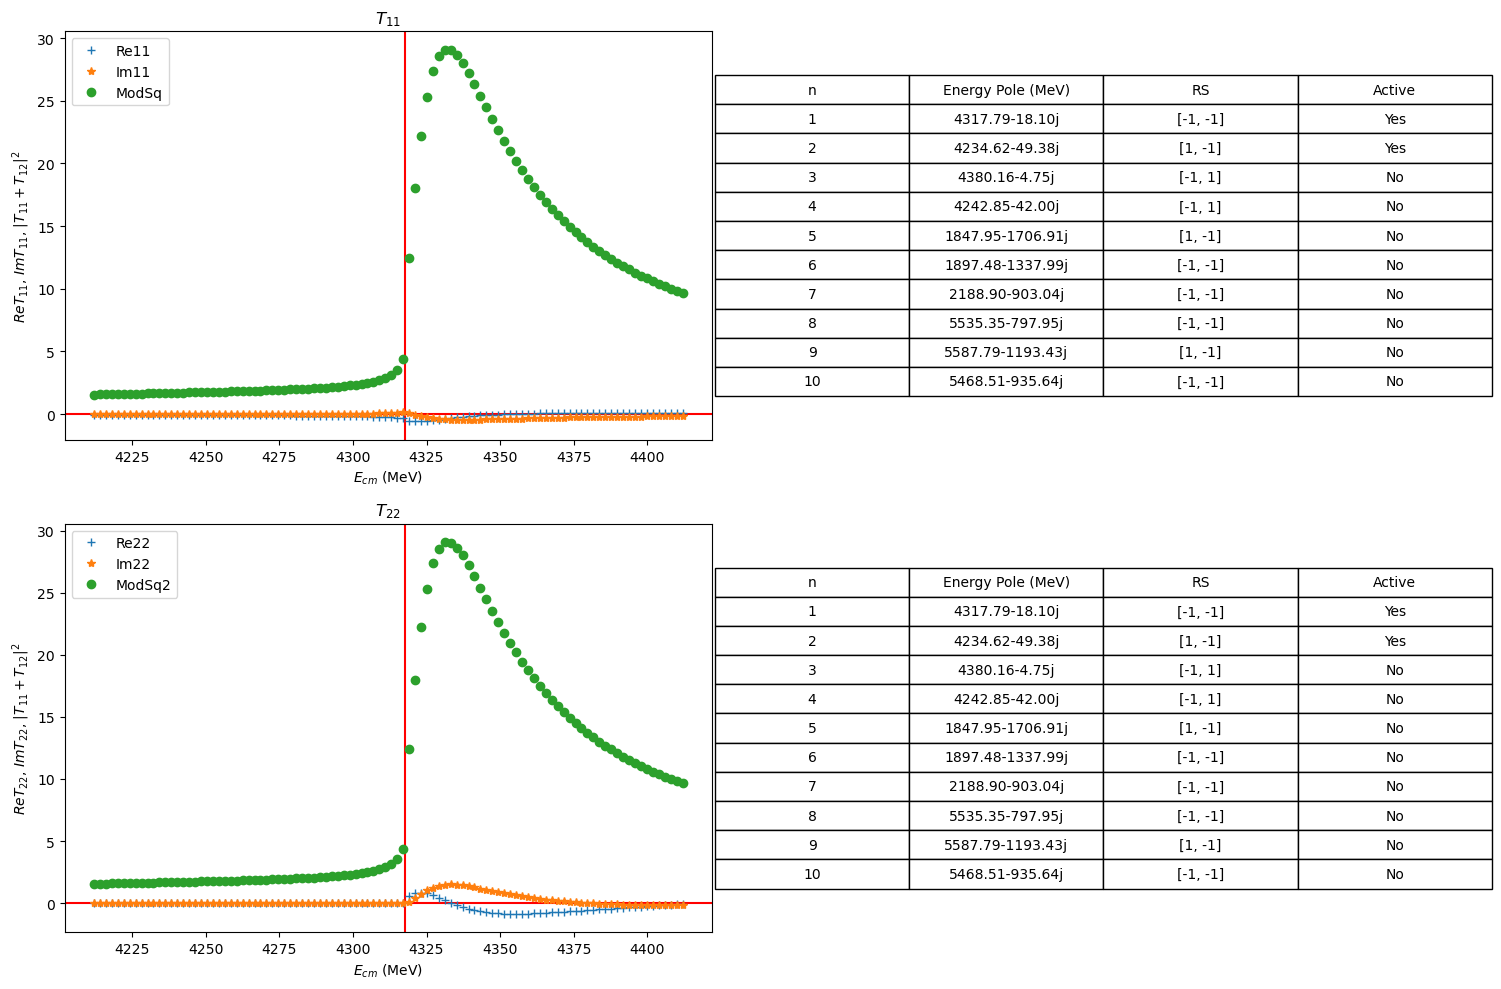

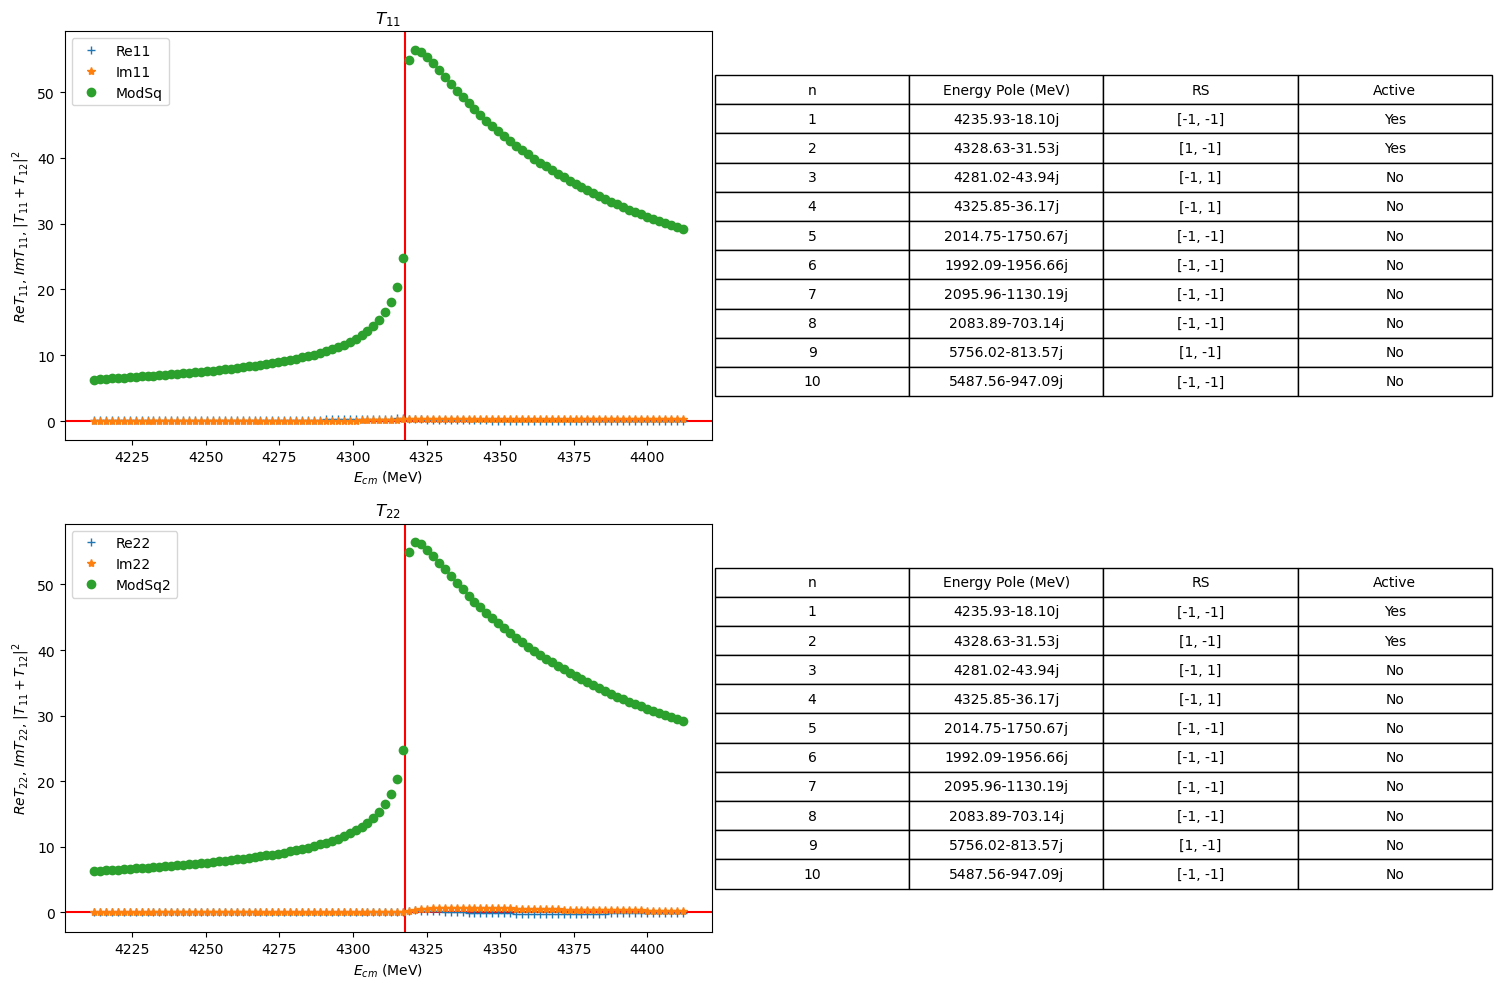

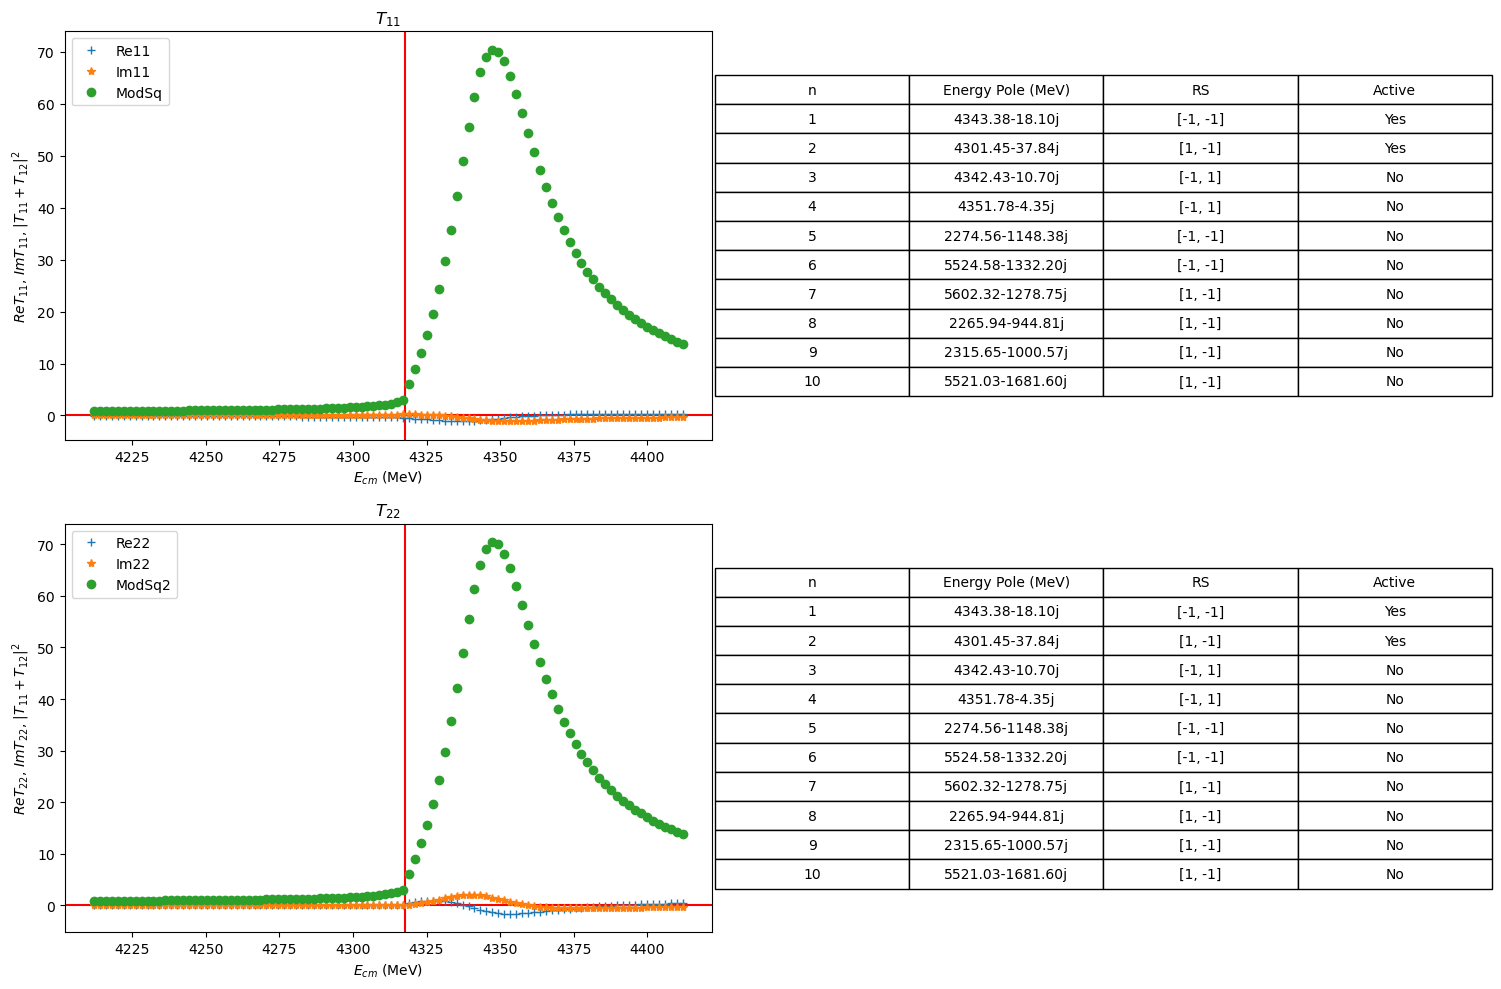

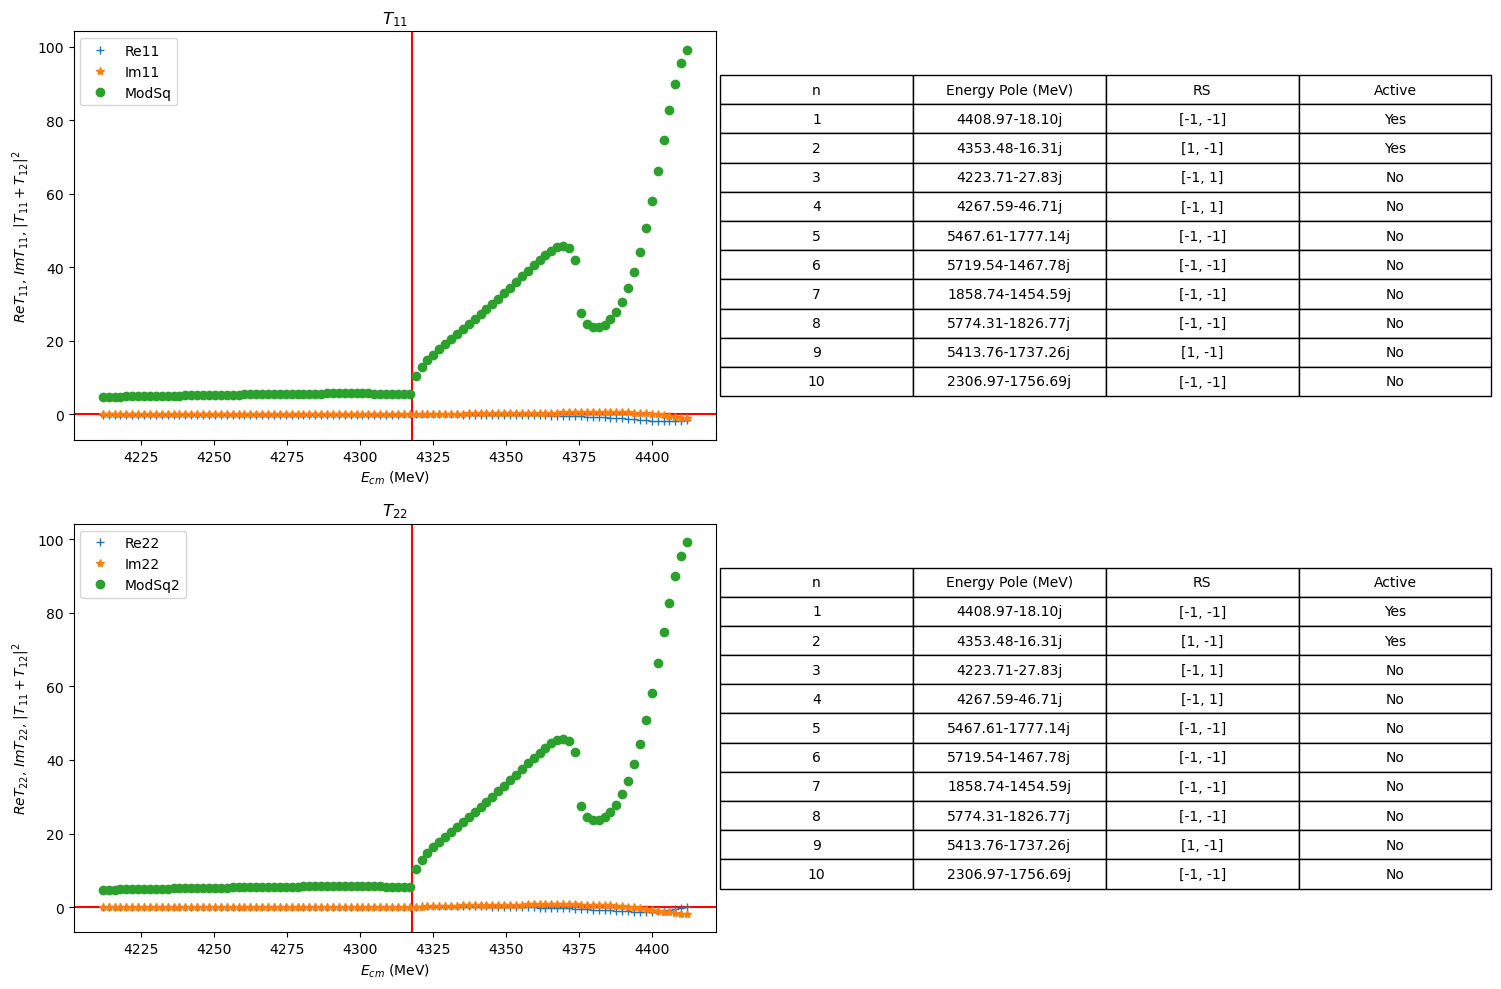

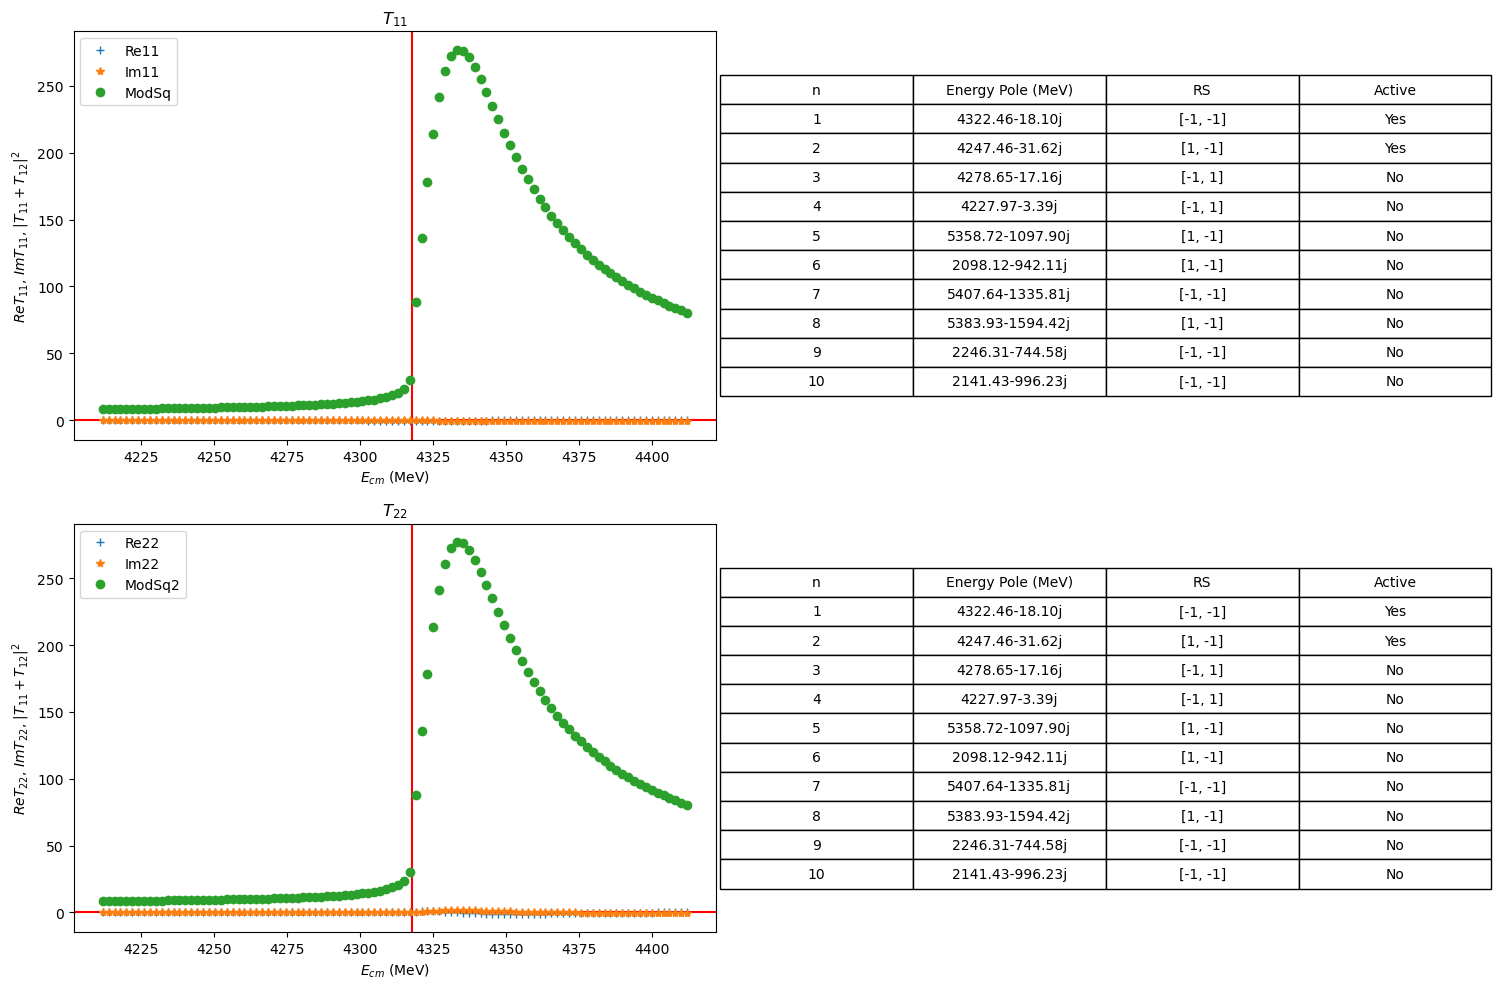

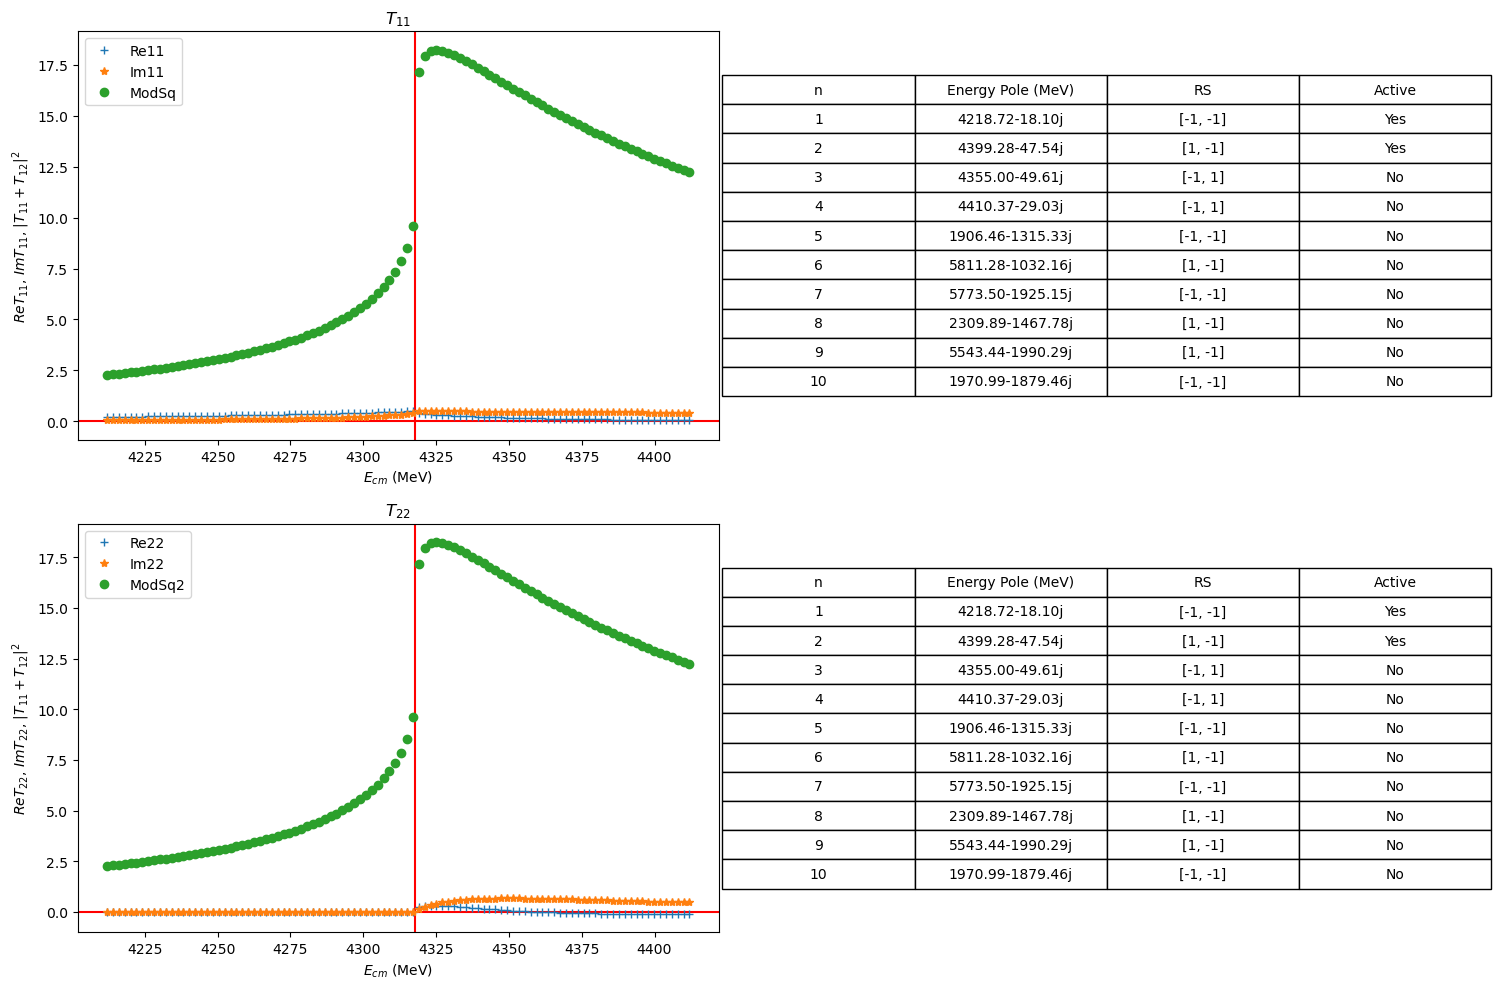

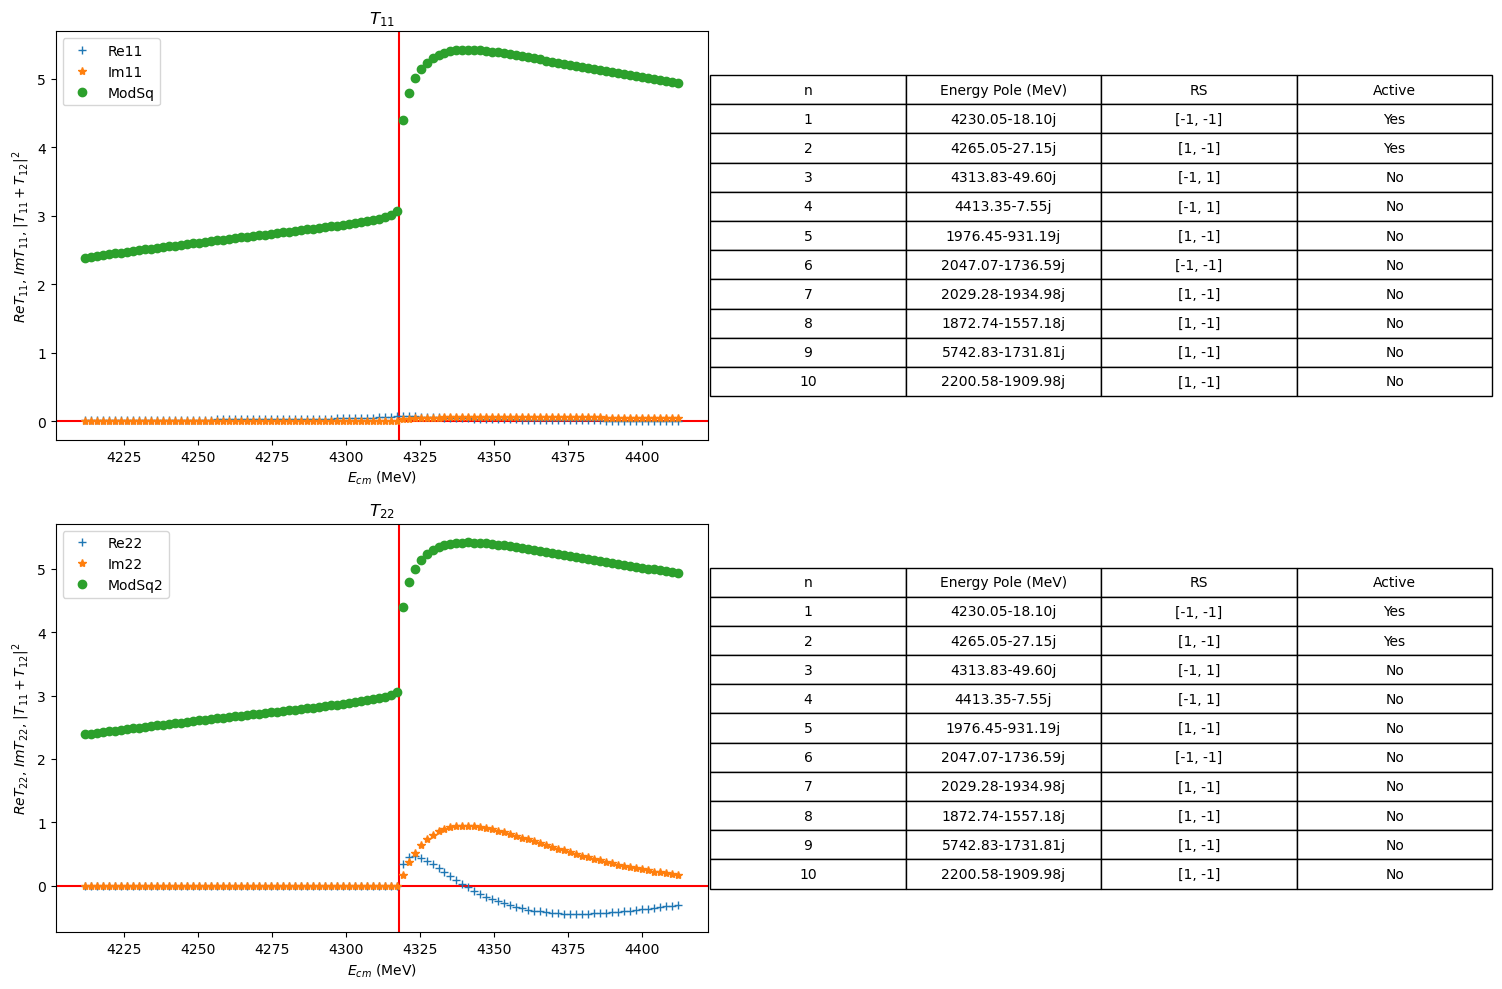

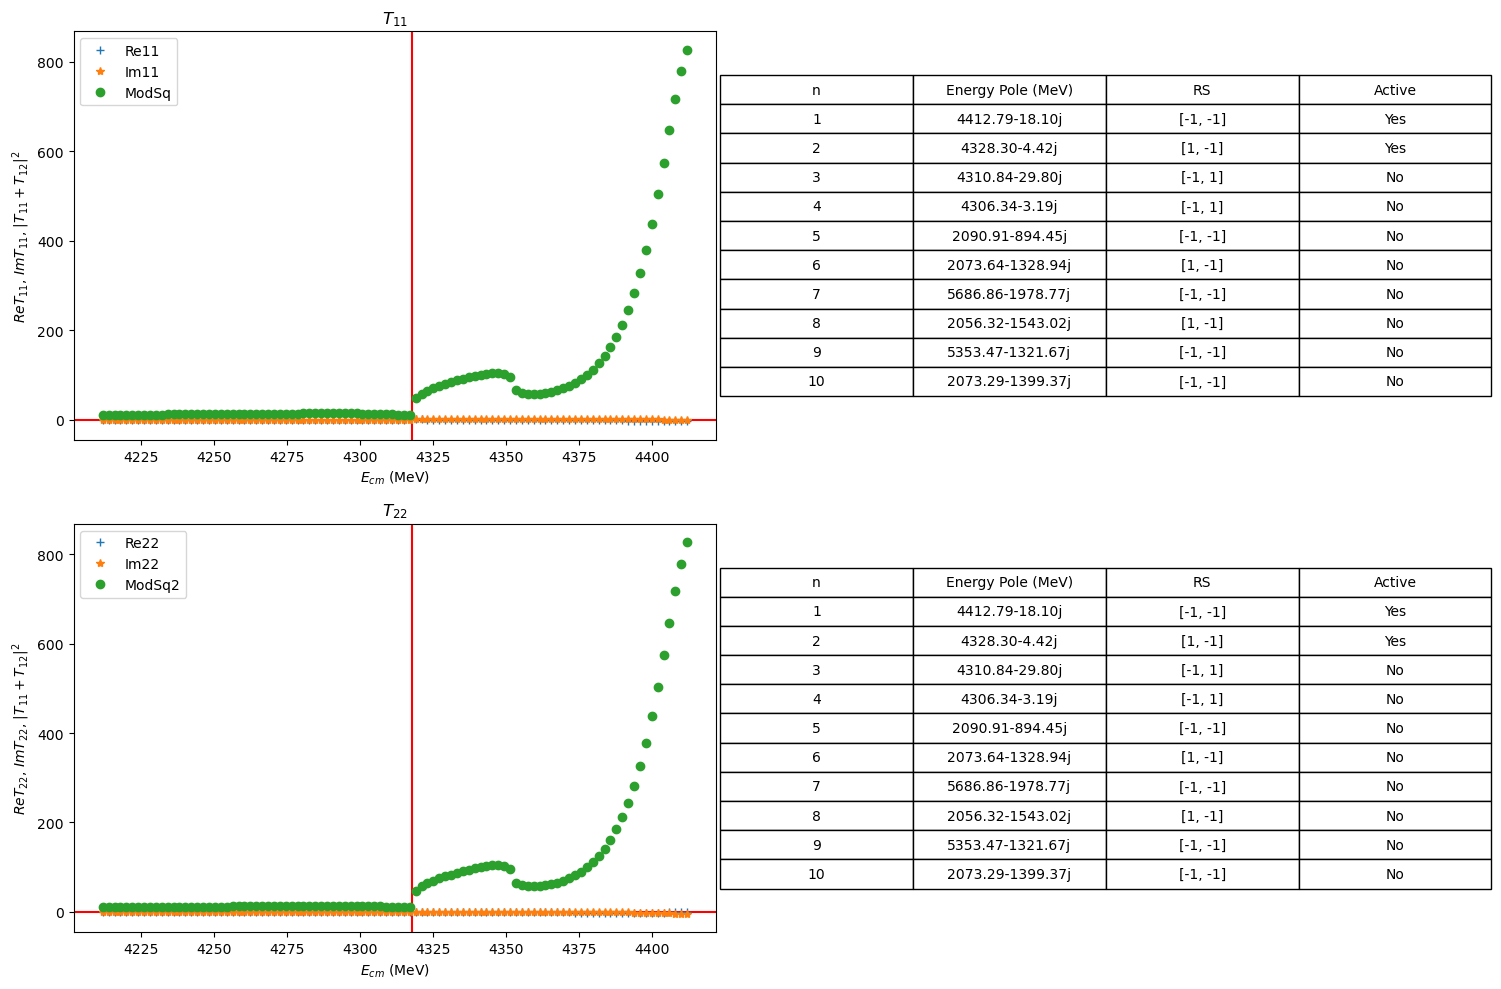

In [3]:
#import dataset_gen00
#import dataset_gen01
#import dataset_gen02
#import dataset_gen03

# # import dataset_gen03
import dataset_gen04

In [5]:
print('done')
curriculum = 2 # 32
directory = f'curriculum{curriculum:02d}_training' #f'curriculum{curriculum:02d}_training'

done


In [7]:
#This is the old curriculum arrangement
# oldcurr = [0, 1, 11, 21,
#            2, 12, 22, 10, 20, 30,
#            3, 13, 23, 6, 8, 16, 18, 26, 28, 34,
#            4, 14, 24, 5, 7, 9, 15, 17, 19, 25, 27, 29, 31, 32, 33]

#This is the new curriculum arrangement -- removed less likely poles
# oldcurr = [0, 1, 11, 21,
#            2, 12, 22, 10, 20, 30,
#               6, 8, 16, 18, 26, 28, 34,
#                7,  15, 17,   27,  31, 32, 33]

#This is the new curriculum arrangement -- final?
oldcurr = [0, 1, 2,
           3, 4,
              5, 6, 7]

In [9]:
#Generate curriculum01
#Note: we used Nreal = 2000 and Nimag = 2000, giving us 4*(2000*2000)=16,000,000 data points
Einput = pickle.load(open(os.path.join(directory,'Einput00.pkl'),'rb'))
for add_data in range(1,curriculum+3):
    xx = oldcurr[add_data]
    EinputXX = pickle.load(open(os.path.join(directory,'Einput{:02d}.pkl'.format(xx)),'rb'))
    Einput = Einput + EinputXX
    del EinputXX
    pickle.dump (Einput, open(os.path.join(directory,'Einput_curr{:02d}.pkl'.format(curriculum)),'wb'), protocol=4)
del Einput

In [11]:
ModEsq = pickle.load(open(os.path.join(directory,'ModEsq00.pkl'),'rb'))
for add_data in range(1,curriculum+3):
    xx = oldcurr[add_data]
    ModEsqXX = pickle.load(open(os.path.join(directory,'ModEsq{:02d}.pkl'.format(xx)),'rb'))
    ModEsq = ModEsq + ModEsqXX
    del ModEsqXX
    pickle.dump (ModEsq, open(os.path.join(directory,'ModEsq_curr{:02d}.pkl'.format(curriculum)),'wb'), protocol=4)
del ModEsq

In [13]:
# Assuming directory is defined
#directory =  #"curriculum03_training"

# Load Einput04.pkl
Einput00 = pickle.load(open(os.path.join(directory, 'Einput00.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq00 = pickle.load(open(os.path.join(directory, 'ModEsq00.pkl'), 'rb'))

# Convert to NumPy arrays
Einput00_array = np.array(Einput00)
ModEsq00_array = np.array(ModEsq00)

# Concatenate Einput and ModEsq arrays
labelin00_array = np.concatenate((Einput00_array, ModEsq00_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin00_array, open(os.path.join(directory, 'labelin00.pkl'), 'wb'), protocol=4)

In [15]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput01 = pickle.load(open(os.path.join(directory, 'Einput01.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq01 = pickle.load(open(os.path.join(directory, 'ModEsq01.pkl'), 'rb'))

# Convert to NumPy arrays
Einput01_array = np.array(Einput01)
ModEsq01_array = np.array(ModEsq01)

# Concatenate Einput and ModEsq arrays
labelin01_array = np.concatenate((Einput01_array, ModEsq01_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin01_array, open(os.path.join(directory, 'labelin01.pkl'), 'wb'), protocol=4)

In [17]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput02 = pickle.load(open(os.path.join(directory, 'Einput02.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq02 = pickle.load(open(os.path.join(directory, 'ModEsq02.pkl'), 'rb'))

# Convert to NumPy arrays
Einput02_array = np.array(Einput02)
ModEsq02_array = np.array(ModEsq02)

# Concatenate Einput and ModEsq arrays
labelin02_array = np.concatenate((Einput02_array, ModEsq02_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin02_array, open(os.path.join(directory, 'labelin02.pkl'), 'wb'), protocol=4)

In [19]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput03 = pickle.load(open(os.path.join(directory, 'Einput03.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq03 = pickle.load(open(os.path.join(directory, 'ModEsq03.pkl'), 'rb'))

# Convert to NumPy arrays
Einput03_array = np.array(Einput03)
ModEsq03_array = np.array(ModEsq03)

# Concatenate Einput and ModEsq arrays
labelin03_array = np.concatenate((Einput03_array, ModEsq03_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin03_array, open(os.path.join(directory, 'labelin03.pkl'), 'wb'), protocol=4)

In [21]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput04 = pickle.load(open(os.path.join(directory, 'Einput04.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq04 = pickle.load(open(os.path.join(directory, 'ModEsq04.pkl'), 'rb'))

# Convert to NumPy arrays
Einput04_array = np.array(Einput04)
ModEsq04_array = np.array(ModEsq04)

# Concatenate Einput and ModEsq arrays
labelin04_array = np.concatenate((Einput04_array, ModEsq04_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin04_array, open(os.path.join(directory, 'labelin04.pkl'), 'wb'), protocol=4)

In [23]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput05 = pickle.load(open(os.path.join(directory, 'Einput05.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq05 = pickle.load(open(os.path.join(directory, 'ModEsq05.pkl'), 'rb'))

# Convert to NumPy arrays
Einput05_array = np.array(Einput05)
ModEsq05_array = np.array(ModEsq05)

# Concatenate Einput and ModEsq arrays
labelin05_array = np.concatenate((Einput05_array, ModEsq05_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin05_array, open(os.path.join(directory, 'labelin05.pkl'), 'wb'), protocol=4)

FileNotFoundError: [Errno 2] No such file or directory: 'curriculum02_training\\Einput05.pkl'

In [ ]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput06 = pickle.load(open(os.path.join(directory, 'Einput06.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq06 = pickle.load(open(os.path.join(directory, 'ModEsq06.pkl'), 'rb'))

# Convert to NumPy arrays
Einput06_array = np.array(Einput06)
ModEsq06_array = np.array(ModEsq06)

# Concatenate Einput and ModEsq arrays
labelin06_array = np.concatenate((Einput06_array, ModEsq06_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin06_array, open(os.path.join(directory, 'labelin06.pkl'), 'wb'), protocol=4)

In [40]:
# Assuming directory is defined
#directory = "curriculum03_training"

# Load Einput04.pkl
Einput07 = pickle.load(open(os.path.join(directory, 'Einput07.pkl'), 'rb'))

# Load ModEsq04.pkl
ModEsq07 = pickle.load(open(os.path.join(directory, 'ModEsq07.pkl'), 'rb'))

# Convert to NumPy arrays
Einput07_array = np.array(Einput07)
ModEsq07_array = np.array(ModEsq07)

# Concatenate Einput and ModEsq arrays
labelin07_array = np.concatenate((Einput07_array, ModEsq07_array), axis=1)

# Save the concatenated data to labelin04.pkl
pickle.dump(labelin07_array, open(os.path.join(directory, 'labelin07.pkl'), 'wb'), protocol=4)

In [26]:
labelin = np.concatenate((pickle.load(open(os.path.join(directory,f'Einput_curr{curriculum:02d}.pkl'.format(xx)),'rb')),
                  pickle.load(open(os.path.join(directory,f'ModEsq_curr{curriculum:02d}.pkl'.format(xx)),'rb'))
                 ), axis=1)

In [28]:
pickle.dump (labelin, open(os.path.join(directory,'labelin_curr{:02d}.pkl'.format(curriculum)),'wb'), protocol=4)
del labelin

In [32]:
labelout = pickle.load(open(os.path.join(directory,'labelout00.pkl'),'rb'))
for add_data in range(1,curriculum+3):
    xx = oldcurr[add_data]
    labeloutXX = pickle.load(open(os.path.join(directory,'labelout{:02d}.pkl'.format(xx)),'rb'))
    labelout = labelout + labeloutXX
    del labeloutXX
    pickle.dump (labelout, open(os.path.join(directory,'labelout_curr{:02d}.pkl'.format(curriculum)),'wb'), protocol=4)
del labelout

In [ ]:
labelin_curr03.pkl'.format(curriculum)), 'rb'))
    outputtraining = pickle.load(open(os.path.join(out, 'labelout_curr{:02d}.pkl'

In [34]:
with open('curriculum03_validation/labelin_curr02.pkl', 'rb') as file:
    data = pickle.load(file)
    
with open('curriculum03_validation/labelout_curr02.pkl', 'rb') as file:
    data2 = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'curriculum03_validation/labelin_curr02.pkl'

In [58]:
print(len(data))

24000


In [60]:
print(len(data2))

24000


In [62]:
get_traintest(directory,curriculum)

Size of training dataset: 19200
Size of testing dataset: 4800
Test output values: [0 1 2 3 4 5 6 7]
Test output value counts: [600 600 600 600 600 600 600 600]


In [64]:
19200+4800

24000

In [66]:
3000*8

24000